In [2]:
from ga_regression import *
from matplotlib import pyplot as plt
from functools import partial
import PIL
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from pvutils import iter_subplots
from pyvista import PolyData
import pyvista as pv
from scipy.stats import pearsonr

C:\Users\dg\.conda\envs\diffnet4\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
file = Path(r"D:\resynth\run_09_10\run00009_resynth\2025-08-15-09-36-32\opts_and_metadata.pt")
readers = Readers.from_file(file)

In [4]:
readers.hparams.iloc[:, 3:]

,input_features,channel,k_eig,learning_rate,decay_every,decay_rate,n_blocks,dropout,n_faces,spike_window,isolate_channel_idx,weight_error,augment,use_visible,use_color,norm_verts,curr_learning_rate
0,xyz,"(29, 2, 19, 31, 0, 23, 12, 14, 18, 8)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",0,None,None,None,None,None,0.0001
1,xyz,"(29, 2, 19, 31, 0, 23, 12, 14, 18, 8)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",1,None,None,None,None,None,0.0001
2,xyz,"(29, 2, 19, 31, 0, 23, 12, 14, 18, 8)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",2,None,None,None,None,None,0.0001
3,xyz,"(29, 2, 19, 31, 0, 23, 12, 14, 18, 8)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",3,None,None,None,None,None,0.0001
4,xyz,"(29, 2, 19, 31, 0, 23, 12, 14, 18, 8)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",4,None,None,None,None,None,0.0001
5,xyz,"(29, 2, 19, 31, 0, 23, 12, 14, 18, 8)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",5,None,None,None,None,None,0.0001
6,xyz,"(29, 2, 19, 31, 0, 23, 12, 14, 18, 8)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",6,None,None,None,None,None,0.0001
7,xyz,"(29, 2, 19, 31, 0, 23, 12, 14, 18, 8)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",7,None,None,None,None,None,0.0001
8,xyz,"(29, 2, 19, 31, 0, 23, 12, 14, 18, 8)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",8,None,None,None,None,None,0.0001
9,xyz,"(29, 2, 19, 31, 0, 23, 12, 14, 18, 8)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",9,None,None,None,None,None,0.0001


In [7]:
r = readers[0]

In [9]:
r.scatter_data.by_channel_loss()

array([0.03856521, 0.01590627, 0.00524364, 0.03748232, 0.05774737,
       0.0482011 , 0.02262186, 0.02424137, 0.02782095, 0.01359866])

In [13]:
epoch, data = r.scalar('loss/train_by_ch')

In [16]:
r.scalars

,step,tag,value
0,0,loss/test,0.005085
1,0,loss/test,0.000764
2,0,loss/test,0.000072
3,0,loss/test,0.002781
4,0,loss/test,0.003808
...,...,...,...
195,4,loss/train_by_ch,0.024061
196,4,loss/train_by_ch,0.030909
197,4,loss/train_by_ch,0.030855
198,4,loss/train_by_ch,0.027723


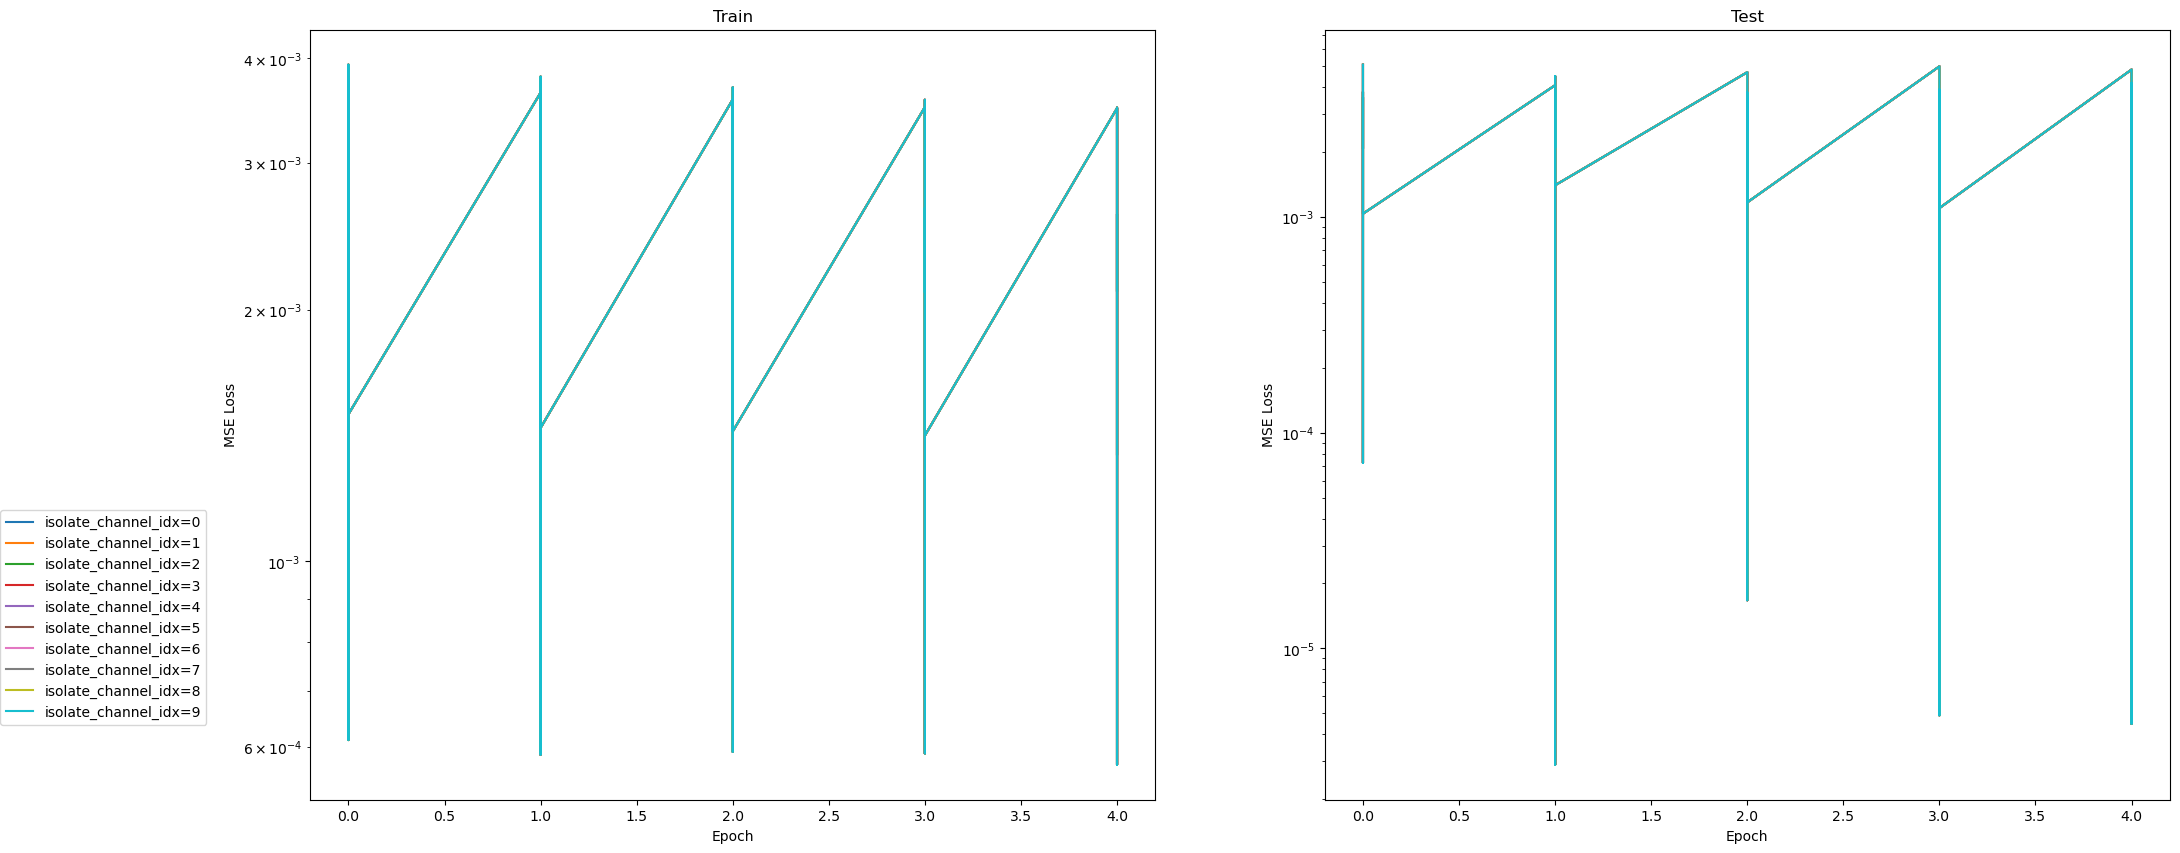

In [5]:
fig, axs = readers.plot_training(tags=None, mode='loss', legend=(0, .15), sharey=False, figsize=(24, 10))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 829/829 [00:21<00:00, 38.11it/s]


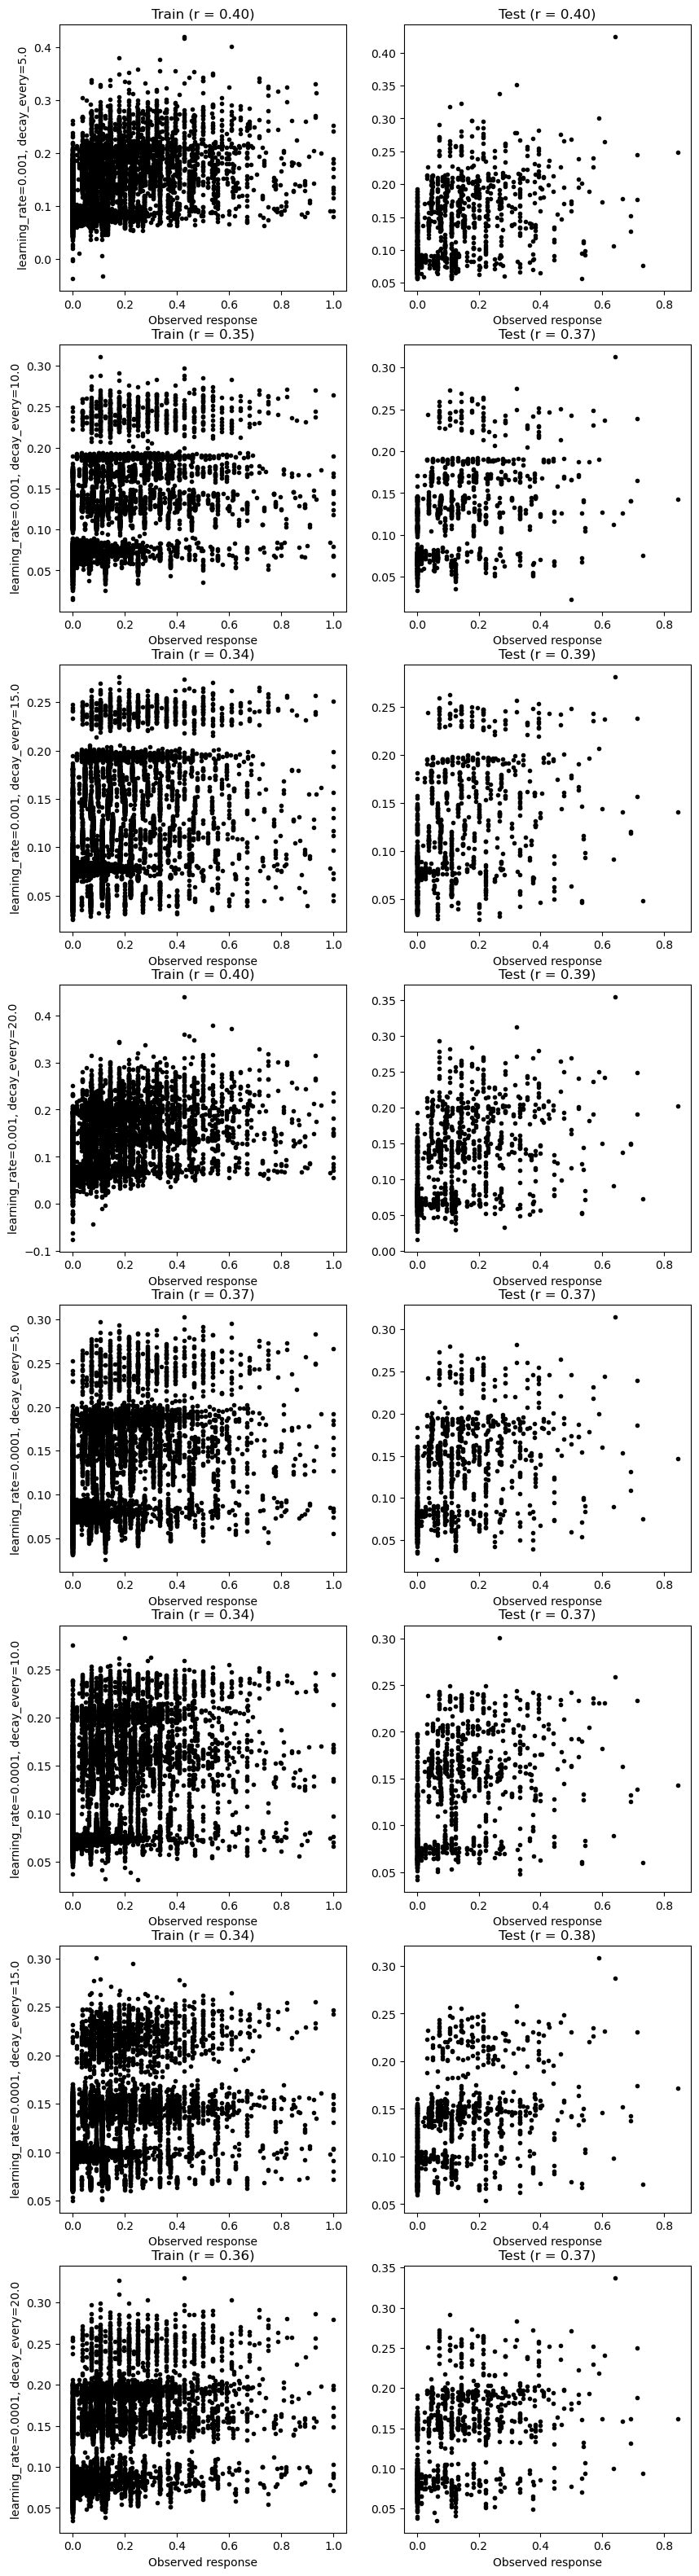

In [5]:
readers.scatter_plots(tags=None)  # TODO ability to load last-trained model